In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pydicom
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

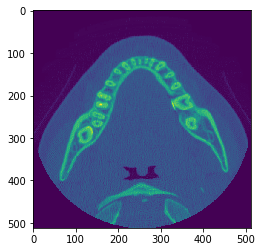

In [2]:
#load a generic image
input_image = pydicom.read_file("/home/tiago/workspace/jaw/Dental_Ct/IM-0209-0031.dcm")

pixel_array = input_image.pixel_array

plt.imshow(pixel_array)
plt.show()

In [3]:
img=pixel_array
type(img[0][0])

dst = np.zeros(pixel_array.shape)

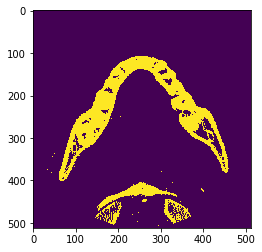

In [4]:
retval, threshold = cv2.threshold(img, 1450, 255, cv2.THRESH_BINARY)
plt.imshow(threshold)


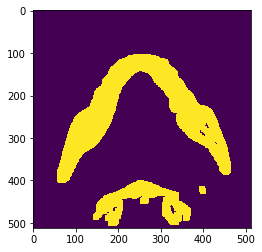

In [5]:
kernel = np.ones((3,3),np.uint16)
ero = cv2.erode(threshold,kernel)
kernel = np.ones((7,7),np.uint16)
dil = cv2.dilate(ero,kernel)
dil = cv2.dilate(dil,kernel)
plt.imshow(dil)

In [6]:
skel = np.zeros(dil.shape,np.uint16)
temp = np.zeros(dil.shape)

In [7]:
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

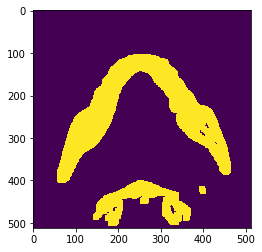

In [8]:
plt.imshow(dil)

In [9]:

#skeletonization
done = False
while False == done:
    temp = cv2.morphologyEx(dil, cv2.MORPH_OPEN, element)
    cv2.bitwise_not(temp,temp)
    temp =cv2.bitwise_and(dil,temp)
    skel = cv2.bitwise_or(skel,temp)
    dil = cv2.erode(dil,element)
    
    max = np.max(dil)
    if max == 0:
        done = True


In [10]:
skel = dil

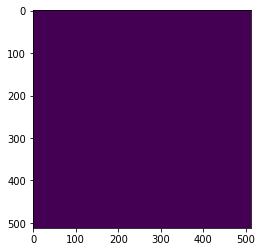

In [11]:
plt.imshow(dil)

In [12]:
#lets find the centroid of the skeleton
xa=0
ya=0
counter =0
for px in range(0,skel.shape[1]):
    for py in range(0,skel.shape[0]):
        if skel[py][px] >0:
            counter +=1
            xa += px
            ya += py
xa = xa / counter
ya = ya / counter
            
            

ZeroDivisionError: division by zero

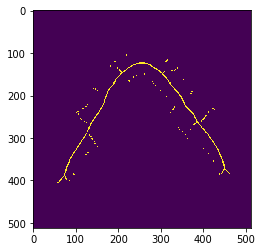

In [308]:
dil = cv2.dilate(skel,element)
plt.imshow(dil)

In [48]:
cv2.__version__


'3.4.0'

In [326]:
def find_non_zero_col(im, a):
    for x in range(0, im.shape[1]):
        if im[a][x] != 0:
            return x
    return im.shape[0]
    
def top_non_zero(im):
    for a in range(0, im.shape[0]):
        if sum(im[a]) != 0:
            return a, find_non_zero_col(im, a)
    return 0



-

In [327]:
mapses = region_growing(dil,255,255)

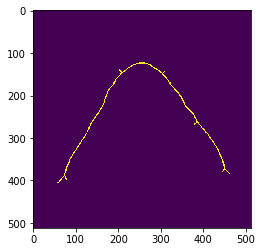

In [328]:
plt.imshow(mapses[0])

In [329]:
cleaned_image = mapses[0]


In [1]:
'''skel = np.zeros(dil.shape,np.uint8)
temp = np.zeros(dil.shape,np.uint8)
copy_clean = cleaned_image.copy().astype(np.uint8)
done = False
while False == done:
    temp = cv2.morphologyEx(copy_clean, cv2.MORPH_OPEN, element)
    cv2.bitwise_not(temp,temp)
    temp =cv2.bitwise_and(copy_clean,temp)
    skel = cv2.bitwise_or(skel,temp)
    dil = cv2.erode(copy_clean,element)
    
    max = np.max(copy_clean)
    print("ping")
    if max == 0:
        done = True'''


'skel = np.zeros(dil.shape,np.uint8)\ntemp = np.zeros(dil.shape,np.uint8)\ncopy_clean = cleaned_image.copy().astype(np.uint8)\ndone = False\nwhile False == done:\n    temp = cv2.morphologyEx(copy_clean, cv2.MORPH_OPEN, element)\n    cv2.bitwise_not(temp,temp)\n    temp =cv2.bitwise_and(copy_clean,temp)\n    skel = cv2.bitwise_or(skel,temp)\n    dil = cv2.erode(copy_clean,element)\n    \n    max = np.max(copy_clean)\n    print("ping")\n    if max == 0:\n        done = True'

3+3

In [288]:
dil_copy = dil.copy()
#isso nao devia funcionar!
for x in range (0,dil.shape[1]):
    for y in range (0, dil.shape[0]):
        if dil[y][x] == 0:
            continue
        else:
            if cleaned_image[y][x]==0:
                dil_copy[y][x]=1


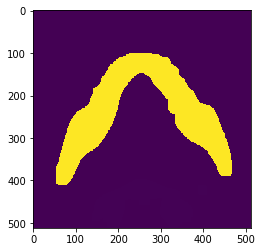

In [289]:
plt.imshow(dil_copy)

In [331]:
final_skeleton =  cleaned_image

[0, 512, 512, 0]

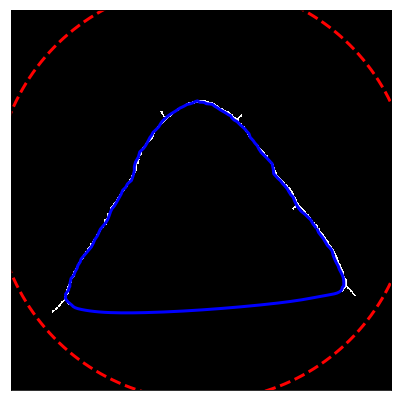

In [359]:
s = np.linspace(0, 2*np.pi, 200)
x = xa + 280*np.cos(s) #260
y = ya + 280*np.sin(s) #230
init = np.array([x, y]).T

snake = active_contour(gaussian(final_skeleton, 1),
                       init, alpha= 0.07, w_line=8,beta=5, gamma=0.05)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(final_skeleton, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, skel.shape[1], skel.shape[0], 0])

In [225]:
index_of_min_x = np.argmin(snake[:,0])
index_of_max_x = np.argmax(snake[:,0])



In [226]:
cobra = np.array([[s[0],s[1]] for s in snake if s[1] < snake[index_of_min_x,1]])

In [135]:
cobra2 = np.array([[s[0],s[1]] for s in cobra if s[0] < snake[index_of_max_x,0]])

[0, 512, 512, 0]

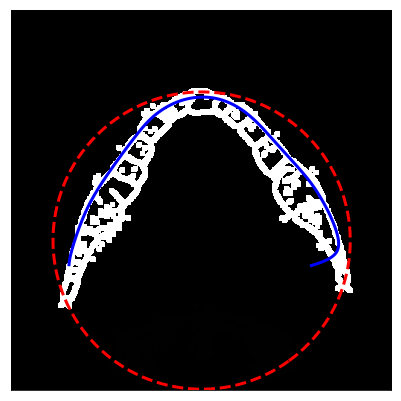

In [227]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(dil_copy, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(cobra[:, 0], cobra[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, skel.shape[1], skel.shape[0], 0])

In [ ]:
# we now need to simplify the shape...

In [228]:
reduced_list = np.array([cobra[x] for x in range(0,len(cobra)) if (x//15)*15== x ])

[0, 512, 512, 0]

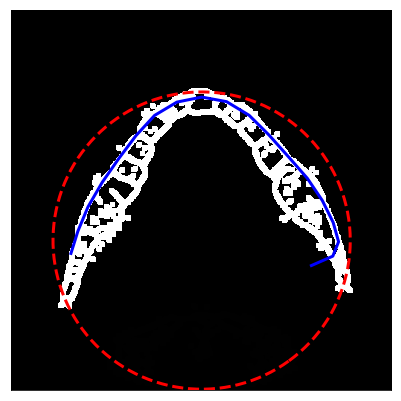

In [229]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(dil_copy, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(reduced_list[:, 0], reduced_list[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, skel.shape[1], skel.shape[0], 0])

In [186]:
len(reduced_list)

18